In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join('/Users/cd8607/Documents/Lammps_MD/', 'git_folder', 'Classes'))
import EAM_Fitting_Serial
import Handle_PotFiles
import time
import glob
os.chdir('/Users/cd8607/Documents/Lammps_MD')

np.linspace(100, 2000, 10)


array([ 100.        ,  311.11111111,  522.22222222,  733.33333333,
        944.44444444, 1155.55555556, 1366.66666667, 1577.77777778,
       1788.88888889, 2000.        ])

In [19]:
proc_id = np.arange(112)

n_procs = len(proc_id)

n_temp = 8

temp_arr = np.logspace(1, 2, n_temp)

n_replica = n_procs // n_temp

temp_id = proc_id // n_temp

replica_id = proc_id % n_replica

print(replica_id)
print(temp_id)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9
 10 11 12 13  0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5
  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9 10 11 12 13  0  1
  2  3  4  5  6  7  8  9 10 11 12 13  0  1  2  3  4  5  6  7  8  9 10 11
 12 13  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13]


In [20]:
files = glob.glob('EAM_Fit_Files/Atom_Files/*.atom')

for file in files:
    with open(file, 'r') as rfile:
        lines = rfile.readlines()

    lines[1] = '0\n'

    with open(file, 'w') as wfile:
        wfile.writelines(lines)

In [25]:
pot, potlines, pot_params = Handle_PotFiles.read_pot('Fitting_Runtime/Potentials/optim.0.eam.alloy')

n_knots = {}
n_knots['He_F'] = 2
n_knots['He_p'] = 0
n_knots['W-He'] = 4
n_knots['He-He'] = 4
n_knots['H-He'] = 0

eam_fit = EAM_Fitting_Serial.Fit_EAM_Potential(pot, n_knots, pot_params, potlines, None, 0, '')
sample = np.loadtxt('sample.txt')
print(sample)

coef_dict = eam_fit.fit_sample(sample)

# x_plt = np.linspace(0, 6, 1000)

# y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He_p'], eam_fit.knot_pts['He_p'])

# plt.plot(x_plt, y_plt)


t1 = time.perf_counter()
eam_fit.sample_to_file(sample)
t2 = time.perf_counter()
print(t2-t1)

[i % 2 for i in np.arange(10)]

[23.44625757  0.04465557  0.72451481 10.06697608 -0.39538117 -1.25306531
  3.05677269 -1.36689304  0.72549573  3.77140825 -2.29180273 -1.49134117
  3.03045931]
0.024074375000054715


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

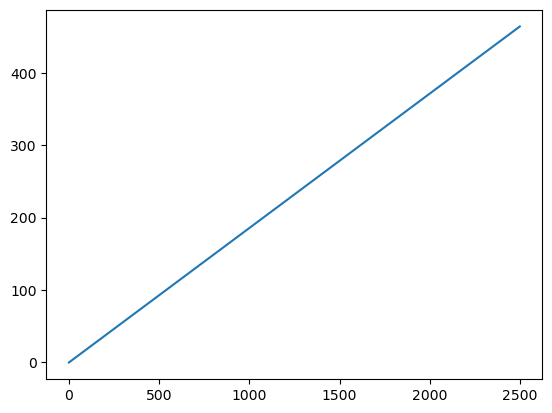

In [26]:
x_plt = np.linspace(0, 20, 1000)

y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['He_F'], eam_fit.knot_pts['He_F'])

# plt.plot(x_plt, y_plt)
plt.plot(pot['He_F'])
# plt.plot(x_plt, sample[0]*np.sqrt(x_plt))

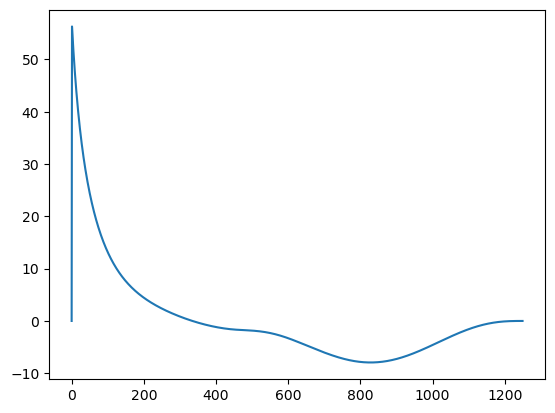

In [27]:
x_plt = np.linspace(1.5, 5, 1000)
zbl = EAM_Fitting_Serial.ZBL(74, 2)

y_plt = EAM_Fitting_Serial.splineval(x_plt, coef_dict['W-He'], eam_fit.knot_pts['W-He'])

plt.plot(pot['He-He'])

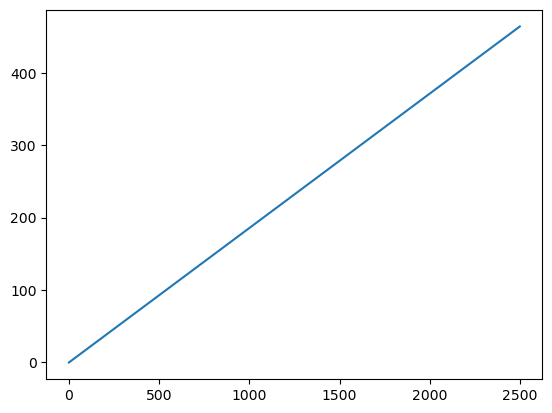

In [28]:
plt.plot(pot['He_F'])

In [ ]:
data = np.loadtxt('dft_data.txt')

data_new = []

for row in data:
    v, h, he, image, ef, rvol = row

    if he == 0 and h > 0:
        continue
    
    data_new.append(row)

data_new = np.array(data_new)

np.savetxt('dft_data_new.txt', data_new ,fmt='%.3f')

In [ ]:
from scipy import interpolate

with open('log.lammps', 'r') as file:
    log = file.readlines()

n_proc = int(log[1].split(' ')[2])

val = log[-1].split()[-2*n_proc:]

data = np.array([float(x) for x in val]).reshape(n_proc, 2)

x = data[:, 0]

y = data[:, 1]

y -= y.min()

cs = interpolate.Akima1DInterpolator(x, y)

x_plt = np.linspace(0,1,100)

y_plt = cs(x_plt)

plt.scatter(x, y, marker='o')
plt.plot(x_plt, y_plt,  linestyle=':')
plt.xlabel('Reaction Coordinate')
plt.ylabel('Energy / eV')
plt.title('Migration of Helium combining from 2 tetrahedral positions')

IndexError: list index out of range